>Jacob Lustig-Yaeger   

# Continuous spectrum from the solar atmosphere  
We now turn to the formation of the solar continuum radiation, concentrating on the visible and near-
infrared parts of its spectrum.  

## 1. Observed solar continua  

We'll get started by importing some necessary python packages and defining some astrophysical quantities.

In [1]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np; import scipy as sp; import matplotlib as mpl
import matplotlib.pyplot as plt; from matplotlib import gridspec
from matplotlib import rc; from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}); mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)
G = 6.67e-8           # Gravitational constant

Table 5 specifies the continuum radiation emitted by the sun between 0.2 - 5 microns, taken from Allen (1976). These data are in the file `solspect.dat`, which looks like:

In [2]:
! head solspect.dat

  0.20  0.02  0.04  0.03  0.04
  0.22  0.07  0.11  0.14  0.20
  0.24  0.09  0.2   0.18  0.30
  0.26  0.19  0.4   0.37  0.5
  0.28  0.35  0.7   0.59  1.19
  0.30  0.76  1.36  1.21  2.15
  0.32  1.10  1.90  1.61  2.83
  0.34  1.33  2.11  1.91  3.01
  0.36  1.46  2.30  2.03  3.20
  0.37  1.57  2.50  2.33  3.62


**Write code to read Table 5.**

In [5]:
solspect = np.genfromtxt('solspect.dat')

# Wavelength (microns):
lam = solspect[:,0]
# Astrophysical flux at the solar surface with spectral irregularities smoothed:
Flam = solspect[:,1]
# Astrophysical flux at the solar surface for the continuum between lines:
Flamp = solspect[:,2]
# Radially emergent intensity at the solar surface with spectral irregularities smoothed:
Ilam = solspect[:,3]
# Radially emergent intensity at the solar surface for the continuum between lines:
Ilamp = solspect[:,4]

Plot the four spectral distributions together in one figure. Use a statement to check that the continuum intensity reaches $I_{\lambda}^c = 4.6 \times 10^{10}$ erg cm$^{−2}$ s$^{−1}$ ster$^{−1}$ $\mu$m$^{−1}$ at $\lambda = 0.41 \mu$m.

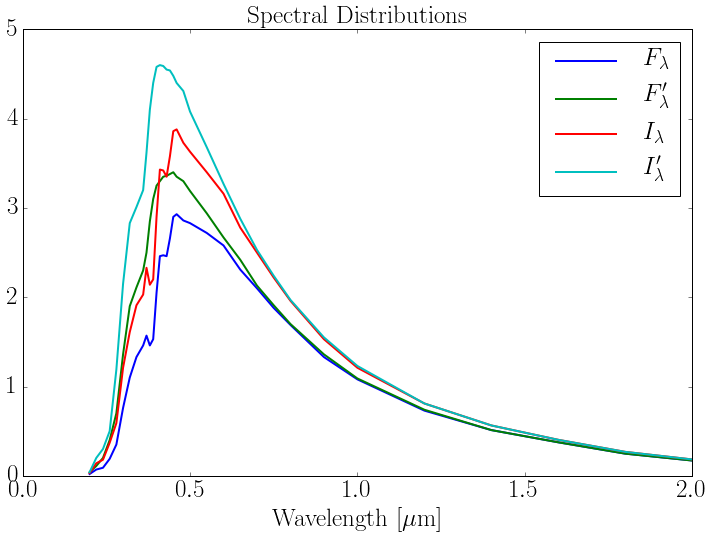

In [9]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Flam, lw=2.0, label=r"$F_{\lambda}$") 
ax0.plot(lam,Flamp, lw=2.0, label=r"$F_{\lambda}'$")      
ax0.plot(lam,Ilam, lw=2.0, label=r"$I_{\lambda}$") 
ax0.plot(lam,Ilamp, lw=2.0, label=r"$I_{\lambda}'$")      
ax0.legend()
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"")
ax0.set_xlim([0,2])
ax0.set_title("Spectral Distributions")
plt.show()

In [ ]:
print 